In [150]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [151]:
x = pd.DataFrame(iris['data'], columns=iris['feature_names'])
x.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [152]:
y = pd.DataFrame(iris['target'], columns=['target'])
y.head(5)

,target
0,0
1,0
2,0
3,0
4,0


In [153]:
iris_data = pd.concat([x,y], axis=1)
iris_data = iris_data[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)','target']]
iris_data.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [154]:
iris_data = iris_data[iris_data['target'].isin([0,2])]
iris_data.tail(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [155]:
target_class = {
   0:1,
   2:-1
}
iris_data['target_class'] = iris_data['target'].map(target_class)
del iris_data['target']
iris_data.tail(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target_class
145,6.7,3.0,5.2,2.3,-1
146,6.3,2.5,5.0,1.9,-1
147,6.5,3.0,5.2,2.0,-1
148,6.2,3.4,5.4,2.3,-1
149,5.9,3.0,5.1,1.8,-1


In [53]:
def sign(z):
    if z > 0:
        return 1
    else:
        return -1
w = np.array([0.,0.,0.,0.,0.]) #初始化w設定為[0,0,0,0,0]
error = 1 #紀錄是否有錯誤分類，沒有的話error=0
iterator = 0 #紀錄更新幾次
while error != 0: #error不等於零就執行此迴圈，也就是要完全沒有錯誤(error=0)才會跳出此迴圈
    error = 0
    for i in range(len(iris_data)): #注意加冒號，逐筆資料進行檢查
        x,y = np.concatenate((np.array([1.]), np.array(iris_data.iloc[i])[:4])), np.array(iris_data.iloc[i])[4]
        if sign(np.dot(w,x)) != y:
            print("iterator: "+str(iterator))
            iterator += 1
            error += 1
            w += y*x            
            print("x: " + str(x))            
            print("w: " + str(w)) 

iterator: 0
x: [1.  5.1 3.5 1.4 0.2]
w: [1.  5.1 3.5 1.4 0.2]
iterator: 1
x: [1.  6.3 3.3 6.  2.5]
w: [ 0.  -1.2  0.2 -4.6 -2.3]
iterator: 2
x: [1.  5.1 3.5 1.4 0.2]
w: [ 1.   3.9  3.7 -3.2 -2.1]
iterator: 3
x: [1.  6.3 3.3 6.  2.5]
w: [ 0.  -2.4  0.4 -9.2 -4.6]
iterator: 4
x: [1.  5.1 3.5 1.4 0.2]
w: [ 1.   2.7  3.9 -7.8 -4.4]


In [54]:
w = np.array([4.,4.,4.,4.,4.]) #初始化w設定為[4,4,4,4,4]
error = 1 #紀錄是否有錯誤分類，沒有的話error=0
iterator = 0 #紀錄更新幾次
while error != 0: #error不等於零就執行此迴圈，也就是要完全沒有錯誤(error=0)才會跳出此迴圈
    error = 0
    for i in range(len(iris_data)): #注意加冒號，逐筆資料進行檢查
        x,y = np.concatenate((np.array([1.]), np.array(iris_data.iloc[i])[:4])), np.array(iris_data.iloc[i])[4]
        if sign(np.dot(w,x)) != y:
            print("iterator: "+str(iterator))
            iterator += 1
            error += 1
            w += y*x            
            print("x: " + str(x))            
            print("w: " + str(w)) 

iterator: 0
x: [1.  6.3 3.3 6.  2.5]
w: [ 3.  -2.3  0.7 -2.   1.5]
iterator: 1
x: [1.  5.1 3.5 1.4 0.2]
w: [ 4.   2.8  4.2 -0.6  1.7]
iterator: 2
x: [1.  6.3 3.3 6.  2.5]
w: [ 3.  -3.5  0.9 -6.6 -0.8]
iterator: 3
x: [1.  5.1 3.5 1.4 0.2]
w: [ 4.   1.6  4.4 -5.2 -0.6]
iterator: 4
x: [1.  6.5 3.2 5.1 2. ]
w: [  3.   -4.9   1.2 -10.3  -2.6]
iterator: 5
x: [1.  5.1 3.5 1.4 0.2]
w: [ 4.   0.2  4.7 -8.9 -2.4]


In [55]:
print(w)
newflower = np.array([1.,4.0, 3.1, 1.6, 1.3]) 
tc = {
    1:'Setosa',
    -1:'Virginica'
}
print('這朵花是 :',tc[sign(np.dot(w,newflower))])

[ 4.   0.2  4.7 -8.9 -2.4]
這朵花是 : Setosa


In [56]:
plt.rcParams['font.family']='SimHei' #顯示中文
df = pd.read_csv('pokemon.csv', encoding='big5')
df

,Number,Name,Type,HP,Attack,Defense,SpecialAtk,SpecialDef,Speed
0,1,妙蛙種子,Grass,45,49.0,49.0,65,65,45
1,2,妙蛙草,Grass,60,62.0,63.0,80,80,60
2,3,妙蛙花Mega,Grass,80,100.0,123.0,122,120,80
3,3,妙蛙花,Grass,80,82.0,83.0,100,100,80
4,4,小火龍,Fire,39,52.0,43.0,60,50,65
...,...,...,...,...,...,...,...,...,...
889,803,毒貝比,Poison,67,73.0,67.0,73,67,73
890,804,四顎針龍,Poison,73,73.0,73.0,127,73,121
891,805,壘磊石,Rock,61,131.0,211.0,53,101,13
892,806,砰頭小丑,Fire,53,127.0,53.0,151,79,107


In [59]:
df1 = df[df['Attack'].notnull()]
df2 = df1[df1['Defense'].notnull()]
df2

,Number,Name,Type,HP,Attack,Defense,SpecialAtk,SpecialDef,Speed
0,1,妙蛙種子,Grass,45,49.0,49.0,65,65,45
1,2,妙蛙草,Grass,60,62.0,63.0,80,80,60
2,3,妙蛙花Mega,Grass,80,100.0,123.0,122,120,80
3,3,妙蛙花,Grass,80,82.0,83.0,100,100,80
4,4,小火龍,Fire,39,52.0,43.0,60,50,65
...,...,...,...,...,...,...,...,...,...
889,803,毒貝比,Poison,67,73.0,67.0,73,67,73
890,804,四顎針龍,Poison,73,73.0,73.0,127,73,121
891,805,壘磊石,Rock,61,131.0,211.0,53,101,13
892,806,砰頭小丑,Fire,53,127.0,53.0,151,79,107


In [86]:
df3 = df2[df2['Type'].isin(['Fighting','Ghost','Normal'])]
df3

,Number,Name,Type,HP,Attack,Defense,SpecialAtk,SpecialDef,Speed
20,16,波波,Normal,40,45.0,40.0,35,35,56
21,17,比比鳥,Normal,63,60.0,55.0,50,50,71
22,18,大比鳥Mega,Normal,83,80.0,80.0,135,80,121
23,18,大比鳥,Normal,83,80.0,75.0,70,70,101
24,19,小拉達,Normal,30,56.0,35.0,25,35,72
...,...,...,...,...,...,...,...,...,...
854,772,屬性：空,Normal,95,95.0,95.0,95,95,59
855,773,銀伴戰獸,Normal,95,95.0,95.0,95,95,95
861,778,謎擬Ｑ,Ghost,55,90.0,80.0,50,105,96
864,781,破破舵輪,Ghost,70,131.0,100.0,86,90,40


In [68]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = df3.iloc[:,4:6]
sc.fit(X)
X_std = sc.transform(X)
X_std

array([[-1.11406225, -0.97812518],
       [-0.58638686, -0.40792355],
       [ 0.11718033,  0.54241249],
       [ 0.11718033,  0.35234528],
       [-0.7271003 , -1.16819239],
       [ 0.15235869, -0.21785635],
       [-0.58638686, -1.3582596 ],
       [ 0.46896392, -0.02778914],
       [-1.11406225, -1.73839401],
       [-0.23460327, -0.78805797],
       [-1.11406225, -1.16819239],
       [-0.23460327, -0.21785635],
       [ 0.99663931, -0.21785635],
       [ 0.82074752,  0.16227807],
       [ 1.8760983 ,  0.54241249],
       [-0.41049506, -0.40792355],
       [ 0.29307213, -0.78805797],
       [-0.93817045, -0.78805797],
       [-0.41049506,  0.54241249],
       [-0.41049506, -0.21785635],
       [ 1.5243147 , -0.48395044],
       [ 0.99663931,  0.50439905],
       [-0.76227866,  0.35234528],
       [-2.52119663, -2.30859564],
       [ 0.64485572,  0.54241249],
       [ 0.82074752,  1.11261411],
       [-1.00852717, -0.67401765],
       [-0.76227866, -0.59799076],
       [-0.58638686,

In [89]:
target_class = {
    'Fighting':0,
    'Ghost':1,
    'Normal':2,
}
df4 = df3.iloc[:,2]
Y = df4.map(target_class)
Y

20     2
21     2
22     2
23     2
24     2
      ..
854    2
855    2
861    1
864    1
888    0
Name: Type, Length: 145, dtype: int64

In [130]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import SVC
OAO = OneVsOneClassifier(SVC(kernel='linear'))
OAO.fit(X_std,Y.values)
error = 0
for i, v in enumerate(OAO.predict(X_std)):
    if v!= Y.values[i]:
        error+=1
print(error)

35


In [131]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y.values,OAO.predict(X_std))

array([[12,  0, 11],
       [ 4, 13, 12],
       [ 5,  3, 85]], dtype=int64)

In [132]:
from sklearn.metrics import accuracy_score
accuracy_score(Y.values,OAO.predict(X_std))

0.7586206896551724

In [133]:
from sklearn.metrics import f1_score
f1_score(Y.values,OAO.predict(X_std), average='weighted')

0.7445360449580727

In [134]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):  

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))]) #對於一維陣列，unique函式去除其中重複的元素，並按元素由小到大排列

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1  #取出花萼長度的最大值與最小值
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1  #取出花瓣長度的最大值與最小值
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),  #使用座標向量創造出座標矩陣，矩陣長度為x1_max-x1_min
                           np.arange(x2_min, x2_max, resolution))  #矩陣寬度為x2_max-x2_min
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T) #ravel函數主要創造一個一維的row vector (1Xn矩陣)
    Z = Z.reshape(xx1.shape)                                       #將兩個1Xn矩陣合併唯1Xn後，在進行轉置，之後每個row就代表一個座標
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)                #Contourf用於繪製等高線圖
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)): #若只有兩類，會回傳[0,1]
        plt.scatter(x=X[y == cl, 0],  #逐一確認哪些點為0，哪些點為1
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    c=cmap(idx),      #將第一種顏色指定給該類別下所有的點，第二種顏色指定給該類別下的點
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
findfont: Font family ['SimHei'] not found. Fa

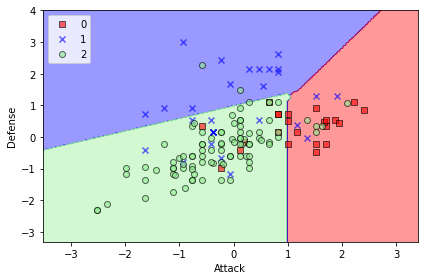

In [148]:
plot_decision_regions(X_std,Y.values, classifier=OAO)
plt.xlabel('Attack')
plt.ylabel('Defense')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()